In [0]:
from platform import python_version
print('Version de python usada en este proyecto', python_version())

Version de python usada en este proyecto 3.7.6


In [0]:
import os
import random

#tensorflow y keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

#división de datos en entrenamiento y teste
from sklearn.model_selection import train_test_split
import sklearn

#Metricas de precisión
from sklearn.metrics import accuracy_score


#manipulación de datos
import numpy as np
import pandas as pd

#manipulación de imagenes
from skimage import io, segmentation as seg
from PIL import Image

#visualización de imagenes
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#formatos de graficos
plt.style.use('fivethirtyeight')



Using TensorFlow backend.


In [0]:
%reload_ext watermark
%watermark -a "Christian Dayan Arcos Gordillo" --iversion

sklearn                                    0.22.1
numpy                                      1.17.4
seaborn                                    0.9.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
pandas                                     0.25.3
tensorflow                                 2.1.0
PIL.Image                                  7.0.0
matplotlib                                 3.1.1
Christian Dayan Arcos Gordillo


### Exploración de datos 

Dataset German Traffic Sign 
El conjunto de datos consiste em 39.209 imágenes a color usadas para entrenamiento y 12.630 imágenes para teste. Cada imágem es una foto de una placa de transito pertenciente a una de las 43 clases.

informacion sobre el dataset puede ser encontrada en 
http://benchmark.ini.rub.de/


Descripción de las Columnas del Dataset de entrenamiento y teste


- Width - Ancho de la imagen

- Height - Altura de la imagen

- Roi.X1 - Coordenada de la Region de Interes X1

- Roi.Y1 - Coordenada de la Region de Interes Y1

- Roi.X2 - Coordenada de la Region de Interes X2

- Roi.Y2 - Coordenada de la Region de Interes Y1

- ClassId - Clase de la Imagen, por ejemplo: "20 km speed limit"

- Path - Camino de la Imagem en el Sistema Operacional

Descripción de las Columnas del Dataset Meta

- Path - Camino para la imágem
- ClassId - ID de la clase de imágem
- ShapeId - Forma de la señal de transito (triangulo 0, 1 círculo, 2 diamantes, 3 hexagonos y 4 inversos)
- ColorId - Color de la señal (0-rojo, 1-azul, 2-amarillo, 3-blanco)
- SignId - ID de la sseñal 

In [0]:
!nvidia-smi

Thu May  7 16:40:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN X (Pascal)    On   | 00000000:05:00.0 Off |                  N/A |
| 23%   41C    P8     9W / 250W |    332MiB / 12194MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  On   | 00000000:09:00.0 Off |                  N/A |
| 23%   37C    P8     9W / 250W |    227MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [0]:
path = "/media/datasets/DeepLearningI/Cap07/gtsrb-german-traffic-sign"

In [0]:
df_train = pd.read_csv(path +'/Train.csv')
df_test = pd.read_csv(path + '/Test.csv')
df_meta = pd.read_csv(path + '/Meta.csv')

In [0]:
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [0]:
df_meta.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [0]:
print('shape del conjunto de entrenamiento ', df_train.shape)
print('shape del conjunto de test ', df_test.shape)
print('shape del conjunto Meta ', df_meta.shape)

shape del conjunto de entrenamiento  (39209, 8)
shape del conjunto de test  (12630, 8)
shape del conjunto Meta  (43, 5)


In [0]:
#tipos de datos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
Width      39209 non-null int64
Height     39209 non-null int64
Roi.X1     39209 non-null int64
Roi.Y1     39209 non-null int64
Roi.X2     39209 non-null int64
Roi.Y2     39209 non-null int64
ClassId    39209 non-null int64
Path       39209 non-null object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
Width      12630 non-null int64
Height     12630 non-null int64
Roi.X1     12630 non-null int64
Roi.Y1     12630 non-null int64
Roi.X2     12630 non-null int64
Roi.Y2     12630 non-null int64
ClassId    12630 non-null int64
Path       12630 non-null object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


In [0]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
Path       43 non-null object
ClassId    43 non-null int64
ShapeId    43 non-null int64
ColorId    43 non-null int64
SignId     43 non-null object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


Resumen estadistico de cada dataset

In [0]:
print('dataset de entrenamiento')
df_train.describe()

dataset de entrenamiento


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [0]:
print('dataset de teste')
df_test.describe()

dataset de teste


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


In [0]:
print('dataset Meta')
df_meta.describe()

dataset Meta


,ClassId,ShapeId,ColorId
count,43.000000,43.000000,43.000000
mean,21.000000,0.790698,0.511628
std,12.556539,0.803508,0.935340
min,0.000000,0.000000,0.000000
25%,10.500000,0.000000,0.000000
50%,21.000000,1.000000,0.000000
75%,31.500000,1.000000,1.000000
max,42.000000,4.000000,3.000000


Existen en total 42 etiquetas diferentes

Verificando datos duplicados

In [0]:
print('cantidad de datos duplicados en entrenamiento ', df_train.duplicated().sum())
print('cantidad de datos duplicados en test ', df_test.duplicated().sum())
print('cantidad de datos duplicados en Meta ', df_meta.duplicated().sum())

cantidad de datos duplicados en entrenamiento  0
cantidad de datos duplicados en test  0
cantidad de datos duplicados en Meta  0


Distribución de imágenes por clase

Text(0, 0.5, 'Cantidad')

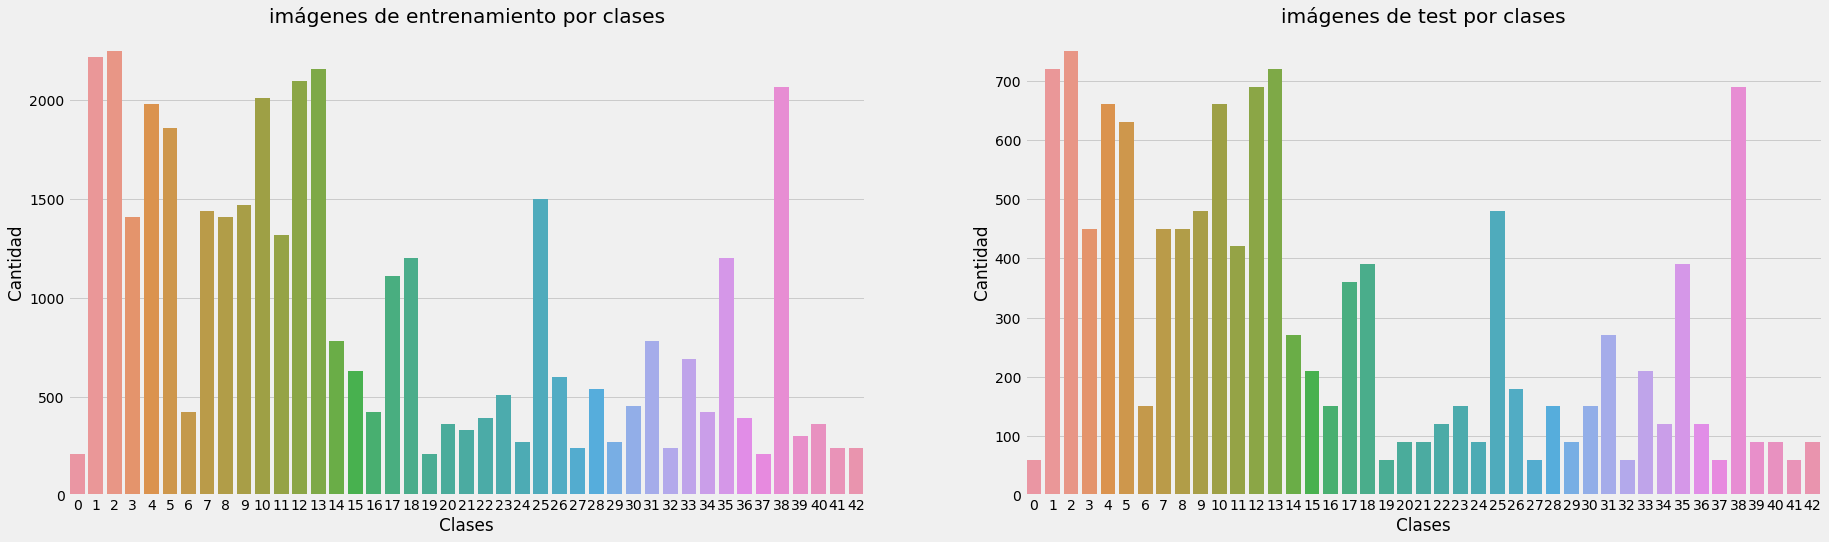

In [0]:
fig, ax = plt.subplots(1,2,figsize = (28,8))

#graficas de histogramas
sns.countplot(df_train.ClassId, ax = ax[0])
sns.countplot(df_test.ClassId, ax = ax[1])

#labels de los graficos

ax[0].set_title ('imágenes de entrenamiento por clases')
ax[0].set_xlabel ('Clases')
ax[0].set_ylabel ('Cantidad')

ax[1].set_title ('imágenes de test por clases')
ax[1].set_xlabel ('Clases')
ax[1].set_ylabel ('Cantidad')


Función para cargar las imágenes de entrenamiento

In [0]:
def imagTrain(path,classes_in,height, width):
    
    #Listas para imágenes y etiquetas
    images = []
    labels = []
    
    classes = [i for i in range(classes_in)]
    
    for classe in classes:
        #anexo del camino de la imágen mas el valor de la respectiva clase que es de0 a 42
        new_path = path + str(classe) +'/'
        
        file_names = [os.path.join(new_path,f) for f in os.listdir(new_path)]
        
        for file in file_names:
            #cargar las imágenes
            image = io.imread(file)
            
            #creamos el array de la imágen
            image_from_array = Image.fromarray(image,'RGB')
            
            #Redimensionando la imágen
            size_image = image_from_array.resize((height,width))
            
            #se adiciona la imágen a la lista de imágenes
            images.append(np.array(size_image))
            
            #Retorna la etiqueta de la imágen
            labels.append(classe)
            
    return images, labels
            

In [0]:
#ejecutar la carga de imágenes
#path
path_train = "/media/datasets/DeepLearningI/Cap07/gtsrb-german-traffic-sign/Train/"

#largo y ancho de la imágen
height = 30
width = 30

# numero de clases
cantidad_clases_train = df_train['ClassId'].nunique()

#ejecutar la función
images_train, labels_train = imagTrain(path_train, cantidad_clases_train,height, width)

0

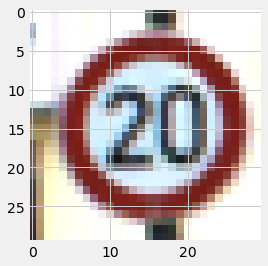

In [0]:
#visualizando imágenes de entrenamiento
plt.imshow(images_train[0])
labels_train[0]

In [0]:
#Cargando imágenes de test
def imagTest(path, lista, height, width):
    
    #lista para cargar imágenes
    images=[]
    
    for image in lista:
        
        #cargar la imágen
        image = io.imread(path + image)
        
        #convertir en un array
        image_from_array = Image.fromarray(image, 'RGB')
        
        #redimensionando la imágen 
        size_image = image_from_array.resize((height,width))
        
        #Adicionar la imágen a la lista de imágenes
        images.append(np.array(size_image))
        
    return images

In [0]:
#ejecutar la carga de imágenes
#path
path = "/media/datasets/DeepLearningI/Cap07/gtsrb-german-traffic-sign/"
lista_imagenes = df_test['Path'].values

#largo y ancho de la imágen
height = 30
width = 30

#ejecutar la función
images_test = imagTest(path, lista_imagenes,height, width)

In [0]:
#verificando shape de imagenes de entrenamiento y de test
images_train = np.array(images_train)
images_test = np.array(images_test)
labels_train = np.array(labels_train)
labels_test = df_test['ClassId'].values

print('El shape de las imágenes de entrenamiento es', images_train.shape)
print('El shape de las imágenes de test es', images_test.shape)
print('El shape de las labels de entrenamiento es', labels_train.shape)
print('El shape de las labels de teste es', labels_test.shape)

El shape de las imágenes de entrenamiento es (39209, 30, 30, 3)
El shape de las imágenes de test es (12630, 30, 30, 3)
El shape de las labels de entrenamiento es (39209,)
El shape de las labels de teste es (12630,)


In [0]:
#visualizando imágenes de test
def VerImag ( imag, labels, images_count):
    for i in range(images_count):
        index = int(random.random()*len(imag))
        plt.axis('off')
        plt.imshow(imag[index])
        plt.show()
        
        print ( 'el tamaño de la imágen es ', imag[index].shape)
        print ( 'la clase de la imágen es ', labels[index])
        

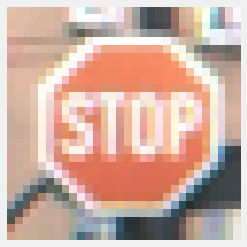

el tamaño de la imágen es  (30, 30, 3)
la clase de la imágen es  14


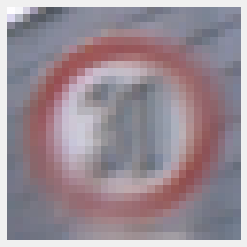

el tamaño de la imágen es  (30, 30, 3)
la clase de la imágen es  1


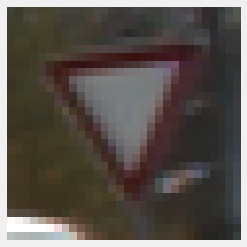

el tamaño de la imágen es  (30, 30, 3)
la clase de la imágen es  13


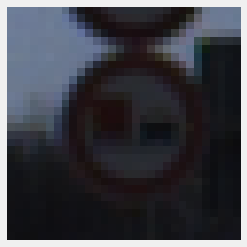

el tamaño de la imágen es  (30, 30, 3)
la clase de la imágen es  10


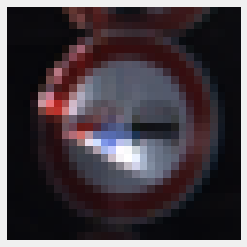

el tamaño de la imágen es  (30, 30, 3)
la clase de la imágen es  9


In [0]:
VerImag(images_test, labels_test, 5)

Dividiendo el dataset en entrenamiento teste y 20% de validación

In [0]:
(X_train, X_valid, label_X, label_valid)=train_test_split(images_train,labels_train, test_size=0.2, random_state=42)

In [0]:
#normalizando los datos de entrenamiento
X_train = X_train.astype('float32')/255
X_valid = X_valid.astype('float32')/255

In [0]:
#convertir las labels en tipo categorica(one-hot)
label_X = to_categorical(label_X,43)
label_valid = to_categorical(label_valid,43)

In [0]:
#modelo convolucional

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters =64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation ='relu'))
model.add(Dropout(rate =0.5))
model.add(Dense(43,activation ='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)         

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics =['accuracy'])

In [0]:
X_test = images_test.astype('float32')/255

In [0]:
score = model.evaluate(X_test, labels_test, verbose=0)
accuracy = 100*score[1]
print('Precisión sin entrenamiento', accuracy)

Precisión sin entrenamiento 4.600158333778381


In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath='signals.hdf5', verbose=1, save_best_only=True)

In [0]:
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto')

In [0]:
epochs = 20

historico_train = model.fit(X_train, label_X, 
                              batch_size = 32,  
                              epochs = epochs,
                              validation_data = (X_valid, label_valid), callbacks = [checkpointer, monitor])

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 6s 207us/step - loss: 0.1512 - accuracy: 0.9740 - val_loss: 0.0446 - val_accuracy: 0.9959

Epoch 00001: val_loss did not improve from 0.03966
Epoch 2/20
31367/31367 [==============================] - 6s 197us/step - loss: 0.1070 - accuracy: 0.9800 - val_loss: 0.0456 - val_accuracy: 0.9953

Epoch 00002: val_loss did not improve from 0.03966
Epoch 3/20
31367/31367 [==============================] - 6s 191us/step - loss: 0.0920 - accuracy: 0.9819 - val_loss: 0.0680 - val_accuracy: 0.9893

Epoch 00003: val_loss did not improve from 0.03966
Epoch 4/20
31367/31367 [==============================] - 6s 193us/step - loss: 0.0871 - accuracy: 0.9832 - val_loss: 0.0404 - val_accuracy: 0.9967

Epoch 00004: val_loss did not improve from 0.03966
Epoch 5/20
31367/31367 [==============================] - 6s 194us/step - loss: 0.0739 - accuracy: 0.9850 - val_loss: 0.0528 - val_accuracy: 0.9918

Ep

In [0]:
#precisión del modelo en cada epoca
historico_train.history['accuracy']

[0.97395355,
 0.979979,
 0.9818918,
 0.98316705,
 0.9849842,
 0.98275256,
 0.9852074,
 0.98836356,
 0.9877897,
 0.9855262,
 0.98852295,
 0.9869927,
 0.98893744,
 0.98753464,
 0.98944753,
 0.98294383]

In [0]:
labels_test_oh = to_categorical(labels_test,43)
score = model.evaluate(X_test, labels_test_oh, verbose=0)
accuracy = 100*score[1]
print('Precisión con entrenamiento', accuracy)

Precisión con entrenamiento 97.3792552947998


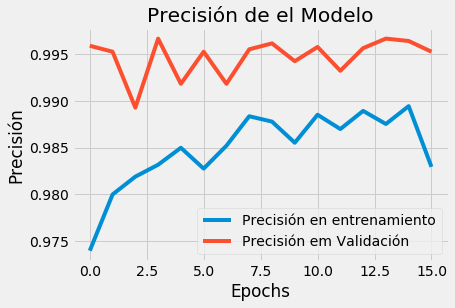

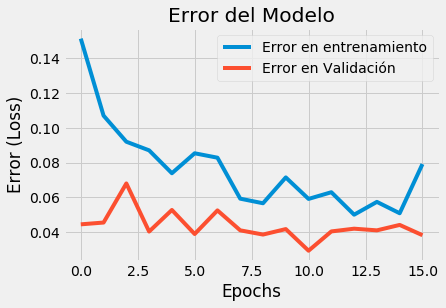

In [0]:
# Plot de las metricas de precisión y perdida.
plt.figure(0)
plt.plot(historico_train.history['accuracy'], label = 'Precisión en entrenamiento')
plt.plot(historico_train.history['val_accuracy'], label = 'Precisión em Validación')
plt.title('Precisión de el Modelo')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

plt.figure(1)
plt.plot(historico_train.history['loss'], label = 'Error en entrenamiento')
plt.plot(historico_train.history['val_loss'], label = 'Error en Validación')
plt.title('Error del Modelo')
plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.legend()
plt.show()

In [0]:
predicciones = model.predict_classes(X_test)

In [0]:
# Precisión en teste
accuracy_score(labels_test, predicciones)

0.9737925574030087